In [17]:
import pandas as pd
import networkx as nx
import statistics as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

# import matplotlib
# print(matplotlib.matplotlib_fname())
# print(matplotlib.get_cachedir())

import matplotlib
matplotlib.font_manager._rebuild()


# A01.1 

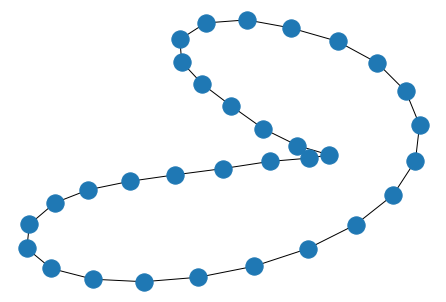

In [18]:
# Method1: use API to generate
# G = nx.random_regular_graph(d=2, n=32, seed=7) # Returns a random -regular graph on nodes.
# nx.draw(G)

# Method2: generate by adding nodes and edges
nodes = list(range(32))
edges = list() 
for i in range(32):
    if i<=30:
        edges.append((i,i+1))
    elif i==31:
        edges.append((31, 0))

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G)


In [19]:
# validation: the degree of all nodes is 2
set(degree for label, degree in G.degree())

{2}

In [20]:
# validation: the number of nodes is 32
G.number_of_nodes()

32

# A01.2

In [21]:
## generate graph

main_path = '/Users/luojiayu/Downloads/semester1/Network Science/Assignments/Assignment 1/'

# Karate
graph_Karate = nx.read_gml(main_path+"karate.gml", label = 'id')

# netscience
graph_netscience = nx.read_gml(main_path+"netscience.gml")

# facebook
facebook_df = pd.read_csv(main_path+"facebook_combined.txt", sep = ' ')
edge_list = list(facebook_df.iloc[:,[0,1]].apply(tuple, axis=1))
graph_facebook = nx.Graph()
graph_facebook.add_edges_from(edge_list)

# 3 graph models
all_graph = {'Karate':graph_Karate, 'netscience':graph_netscience,'facebook':graph_facebook}


In [22]:
## calculation degreee, density

def max_degree(g):
    """
    args:
        g: graph model
    return:
        largest_degree:
        label: label of the largest degree
    """
    largest_degree, largest_label = -1, ''
    for label, degree in g.degree():
        if degree > largest_degree:
            largest_degree, largest_label = degree, str(label)
    return (largest_degree, largest_label)


for graph_name in all_graph.keys():
    graph = all_graph[graph_name]
    L = graph.number_of_edges()
    N = graph.number_of_nodes()
    
    avg_degree = round(st.mean(d for n, d in graph.degree()), 8)
    density = round((2*L)/(N*(N-1)), 8)
    largest_degree, largest_label = max_degree(graph)
    
    print("## "+graph_name+" ##")
    print(("%-25s %-10s") % ("average degree", avg_degree))
    print(("%-25s %-10s")%("density", density))
    print(("%-25s %-10s")%("largest degree", largest_degree))
    print(("%-25s %-10s")%("largest degree label", largest_label))
    print()


## Karate ##
average degree            4.58823529
density                   0.13903743
largest degree            17        
largest degree label      34        

## netscience ##
average degree            3.45122719
density                   0.00217332
largest degree            34        
largest degree label      BARABASI, A

## facebook ##
average degree            43.69051745
density                   0.01081984
largest degree            1045      
largest degree label      107       



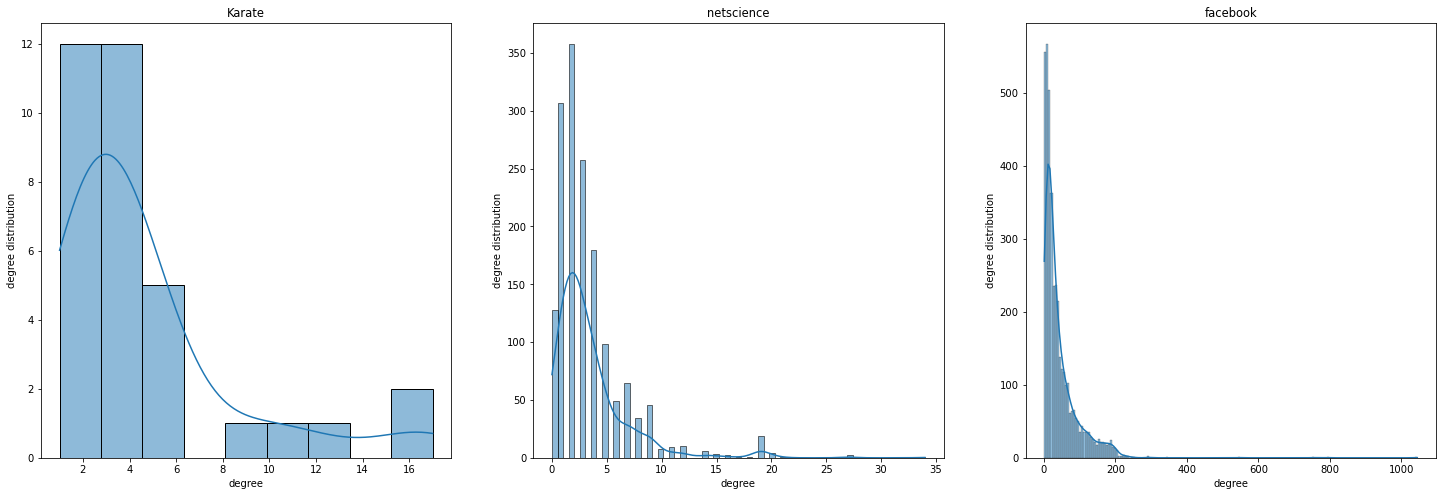

In [14]:
## draw the distribution of degree: lin-lin

fig, axs = plt.subplots(ncols=3, figsize=(25, 8))
picture_index = 0

for graph_name in all_graph.keys():
    
    graph = all_graph[graph_name]
    
    degree_list = [degree for label, degree in graph.degree()]
    degree_arr = np.asarray(degree_list)

    sns.histplot(data=degree_arr, kde=True, ax=axs[picture_index])
    axs[picture_index].set(xlabel='degree', ylabel='degree distribution')
    axs[picture_index].set_title(graph_name, fontdict = {'fontsize' : 11.5})
    picture_index += 1


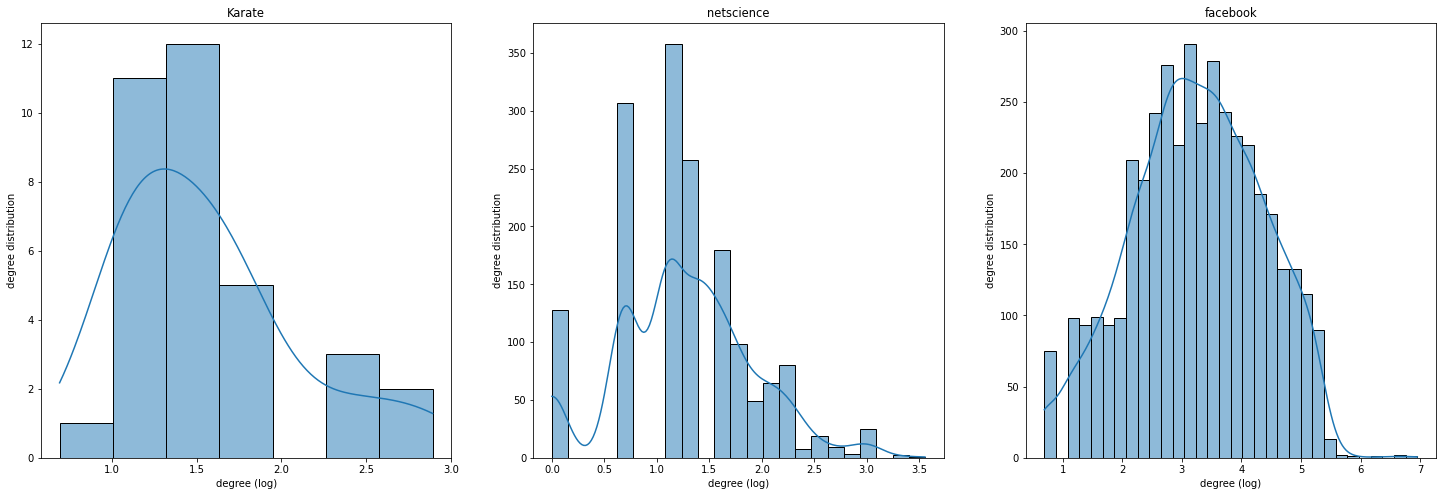

In [23]:
## draw the distribution of degree: log-lin

fig, axs = plt.subplots(ncols=3, figsize=(25, 8))
picture_index = 0

for graph_name in all_graph.keys():
    
    graph = all_graph[graph_name]
    
    # why use log1p rather log: log(0) is invalid. dataset contains many vertex whose degree are 0
    # log1p definition: Return the natural logarithm of 1+x (base e). The result is calculated in a way which is accurate for x near zero.
    degree_list = [math.log1p(degree) for label, degree in graph.degree()] 
    degree_arr = np.asarray(degree_list)

    sns.histplot(data=degree_arr, kde=True, ax=axs[picture_index])
    axs[picture_index].set(xlabel='degree (log)', ylabel='degree distribution')
    axs[picture_index].set_title(graph_name, fontdict = {'fontsize' : 11.5})
    picture_index += 1

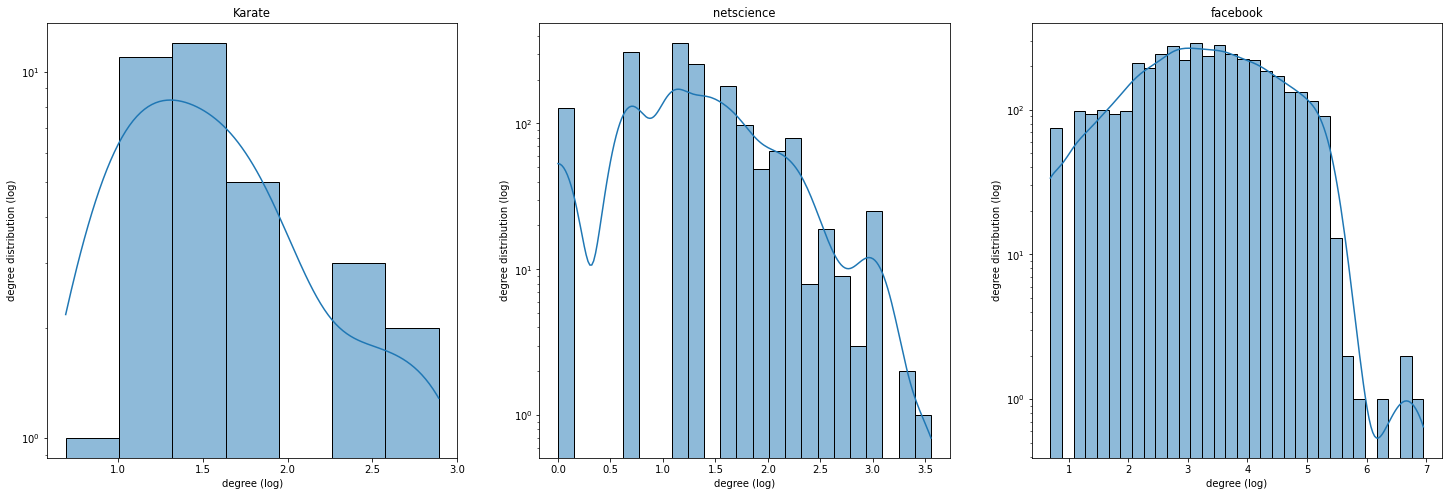

In [24]:
## draw the distribution of degree: log-log

fig, axs = plt.subplots(ncols=3, figsize=(25, 8))
picture_index = 0

for graph_name in all_graph.keys():
    
    graph = all_graph[graph_name]
    
    # why use log1p rather log: log(0) is invalid. dataset contains many vertex whose degree are 0
    # log1p definition: Return the natural logarithm of 1+x (base e). The result is calculated in a way which is accurate for x near zero.
    degree_list = [math.log1p(degree) for label, degree in graph.degree()] 
    degree_arr = np.asarray(degree_list)

    sns.histplot(data=degree_arr, kde=True, ax=axs[picture_index])
    axs[picture_index].set(xlabel='degree (log)', ylabel='degree distribution (log)')
    axs[picture_index].set_title(graph_name, fontdict = {'fontsize' : 11.5})
    axs[picture_index].set_yscale('log') # log(y)
    picture_index += 1